#Flujo de trabajo en un modelo de clasificación con Redes Neuronales

##1. Formular/Delinear el problema

###Set de Datos

In [ ]:
import pandas as pd
from numpy import shape
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import tensorflow as tf

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

drive_folder_path = '/content/drive/MyDrive/diplo_DSA_2023/'

penguins = pd.read_csv(drive_folder_path + "penguins.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##2. Identificar entradas y salidas

In [ ]:
penguins.shape

(344, 8)

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
features = penguins.dropna()

features.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [ ]:
features.shape

(333, 8)

##3. Preparar los datos

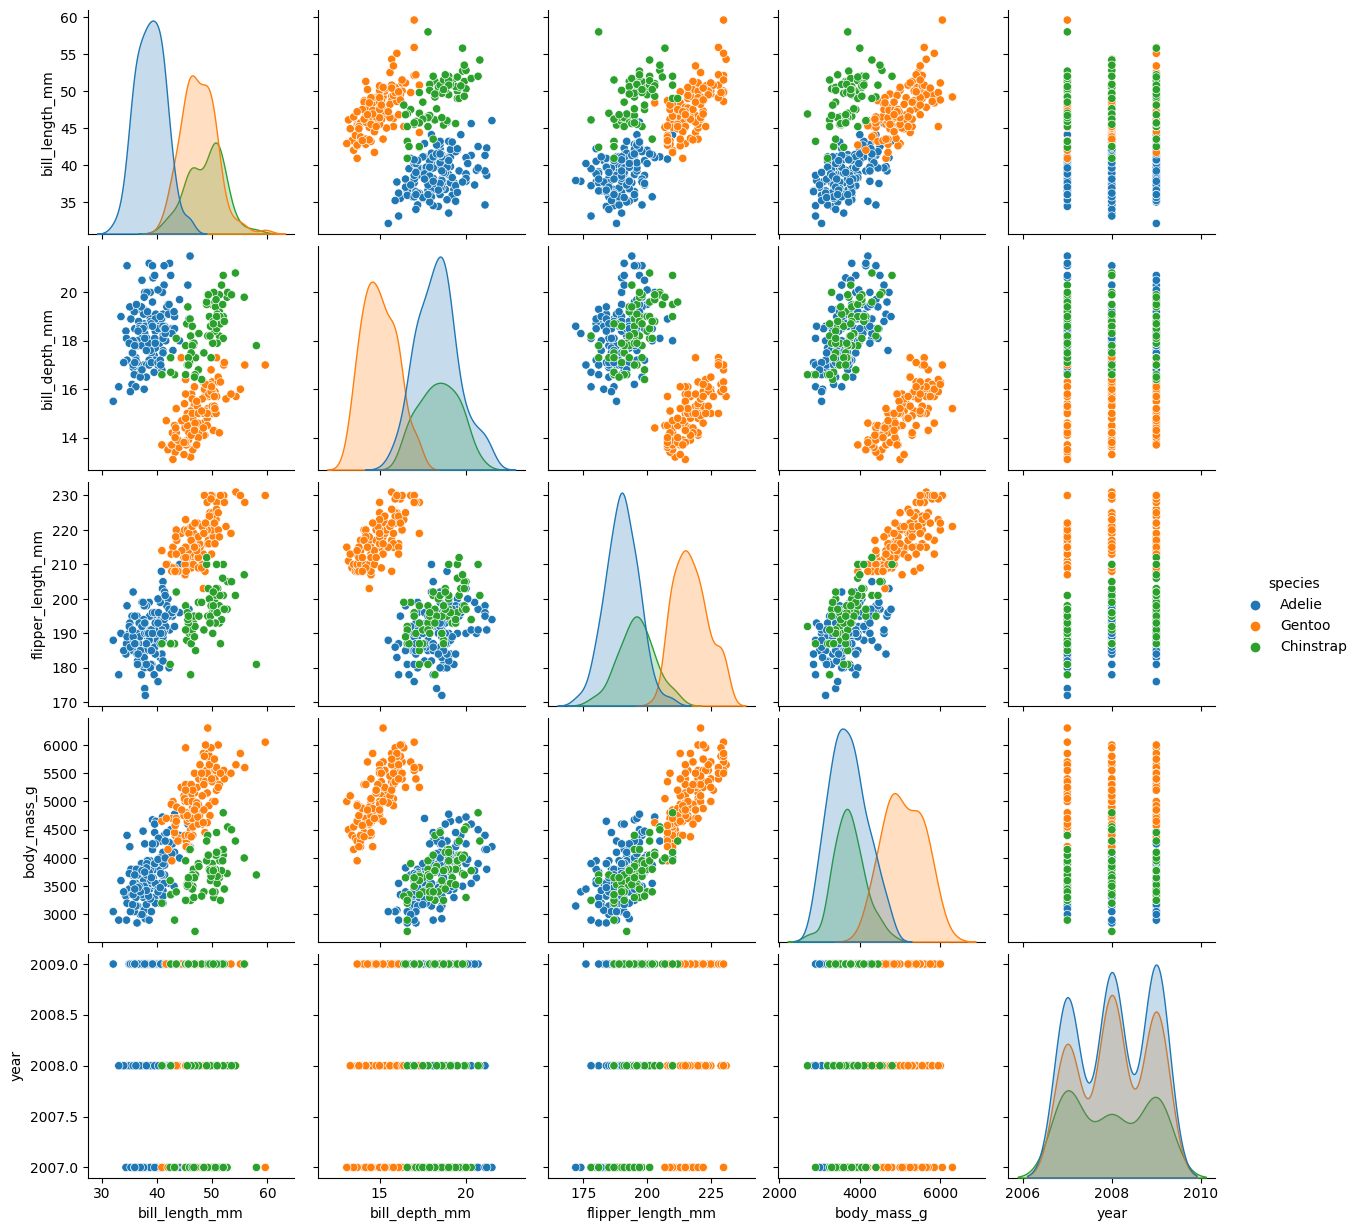

In [ ]:
sns.pairplot(features, hue = "species")

In [ ]:
target = pd.get_dummies(features["species"])

features = pd.get_dummies(features, columns=["sex"])

features.drop('island', axis=1, inplace=True)

features.drop('year', axis=1, inplace=True)

features.drop('species', axis=1, inplace=True)

features = (features - features.min()) / (features.max() - features.min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True ,stratify=target)

##4. Seleccionar el modelo

In [ ]:
inputs = keras.Input(shape = X_train.shape[1])

hidden_layer = keras.layers.Dense(10, activation = "relu")(inputs)

output_layer = keras.layers.Dense(y_train.shape[1], activation = "softmax")(hidden_layer)

model = keras.Model(inputs = inputs, outputs = output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


##5. Seleccionar una función de Loss y un optimizador

In [ ]:
model.compile(optimizer = "adam", loss = keras.losses.CategoricalCrossentropy())

##6. Entrenar el modelo

In [ ]:
history = model.fit(X_train, y_train, epochs = 260)

Epoch 1/260
9/9 [==============================] - 1s 3ms/step - loss: 1.4469
Epoch 2/260
9/9 [==============================] - 0s 3ms/step - loss: 1.3759
Epoch 3/260
9/9 [==============================] - 0s 2ms/step - loss: 1.3143
Epoch 4/260
9/9 [==============================] - 0s 2ms/step - loss: 1.2607
Epoch 5/260
9/9 [==============================] - 0s 3ms/step - loss: 1.2163
Epoch 6/260
9/9 [==============================] - 0s 2ms/step - loss: 1.1759
Epoch 7/260
9/9 [==============================] - 0s 2ms/step - loss: 1.1437
Epoch 8/260
9/9 [==============================] - 0s 3ms/step - loss: 1.1123
Epoch 9/260
9/9 [==============================] - 0s 2ms/step - loss: 1.0835
Epoch 10/260
9/9 [==============================] - 0s 2ms/step - loss: 1.0572
Epoch 11/260
9/9 [==============================] - 0s 4ms/step - loss: 1.0316
Epoch 12/260
9/9 [==============================] - 0s 2ms/step - loss: 1.0052
Epoch 13/260
9/9 [==============================] - 0s 2ms/st

<Axes: >

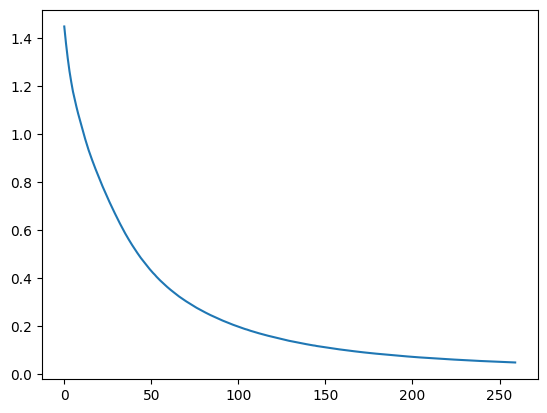

In [ ]:
sns.lineplot(x = history.epoch, y = history.history["loss"])

##7. Realizar una predicción/clasificación

In [ ]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame(y_pred, columns = target.columns)
prediction

3/3 [==============================] - 0s 3ms/step


,Adelie,Chinstrap,Gentoo
0,0.001090,0.996645,0.002265
1,0.000123,0.027998,0.971879
2,0.968506,0.029236,0.002259
3,0.204228,0.787312,0.008460
4,0.974111,0.023248,0.002641
...,...,...,...
62,0.022174,0.970650,0.007176
63,0.991811,0.008058,0.000131
64,0.000036,0.000675,0.999290
65,0.998017,0.001778,0.000206


In [ ]:
predicted_class = prediction.idxmax(axis = "columns")
predicted_class

0     Chinstrap
1        Gentoo
2        Adelie
3     Chinstrap
4        Adelie
        ...    
62    Chinstrap
63       Adelie
64       Gentoo
65       Adelie
66    Chinstrap
Length: 67, dtype: object

##8. Obtener una medida de rendimiento

In [ ]:
true_class = y_test.idxmax(axis = "columns")

matrix = confusion_matrix(true_class, predicted_class)
print(matrix)

[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


<Axes: xlabel='predited label', ylabel='true label'>

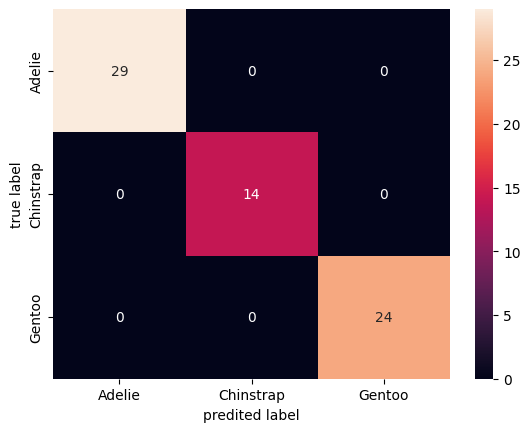

In [ ]:
confusion_df = pd.DataFrame(matrix, index = y_test.columns.values, columns = y_test.columns.values)

confusion_df.index.name = "true label"
confusion_df.columns.name = "predited label"

sns.heatmap(confusion_df, annot = True)

##9. Ajustar los hiperparámetros

## Con los siguientes ajustes:

stratify=target

epochs = 260

**Se obtuvo:**

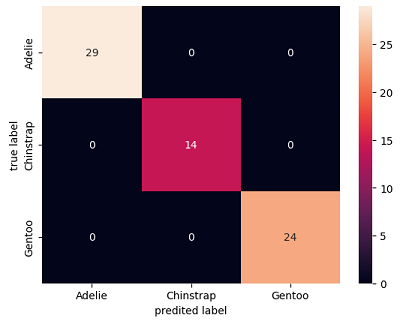




##10. Guardar/Recupear el modelo

In [ ]:
#Guardar modelo en Drive Google y Sistema Local

# Descargar el modelo en Drive Google
model.save(drive_folder_path + 'modelo_neuronal.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Recuperar modelo de Drive Google

loaded_model = tf.keras.models.load_model(drive_folder_path + 'modelo_neuronal.h5')

**Probamos el Modelo Cargado de Disco**

In [ ]:
y_pred = loaded_model.predict(X_test)
prediction = pd.DataFrame(y_pred, columns = target.columns)
prediction

**Vemos el contenido del Arhivo**

In [ ]:
import h5py

# Abre el archivo H5
with h5py.File(drive_folder_path +'modelo_neuronal.h5', 'r') as file:
    # Imprime la estructura del archivo H5
    def print_h5_structure(group, indent=0):
        for key in group.keys():
            item = group[key]
            if isinstance(item, h5py.Group):
                print(" " * indent + f"Grupo: {key}")
                print_h5_structure(item, indent + 4)
            elif isinstance(item, h5py.Dataset):
                print(" " * indent + f"Conjunto de datos: {key}")

    print_h5_structure(file)